# 1. Know about the Data

### Importing Libraries

In [2]:
# Importing necessary libraries
# Importing pandas and numpy for data preprocessing and data wrangling
import pandas as pd
import numpy as np

# Import the 'calendar' and 'datetime' module
import calendar
import datetime as dt

# Importing tools for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [3]:
# Load Dataset
dataframe = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

### Dataset view

In [4]:
# Displaying the first few rows of dataset
dataframe.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### Dataset rows and columns count

In [5]:
# Dataset rows and columns count
# Checking the number of rows and columns of the dataset using shape
print("Number of rows: ", dataframe.shape[0])
print("Number of columns: ", dataframe.shape[1])

Number of rows:  267
Number of columns:  9


### Dataset Information

In [6]:
# Dataset basic info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


### Missing values/Null values

In [7]:
# Checking for null values/ missing values
dataframe.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

### Duplicate values count

In [8]:
# Duplicate value count
duplicate = dataframe.duplicated().sum()
print("Number of duplicate rows are: ", duplicate)

Number of duplicate rows are:  0


### What things we know about the dataset?
- The unemployment dataset consits of Region, Date, Unemployment rate etc. for Indian states
- There are 267 rows and 9 columns provided in the data
- There is no null value present in the dataset
- There is no duplicate rows present in the dataset

# 2. Understanding the variables

In [9]:
# Dataset Columns
dataframe.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [10]:
# Dataset describe
dataframe.describe(include = 'all').round(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
count,267,267,267,267.00,267.00,267.00,267,267.00,267.00
unique,27,10,1,NaN,NaN,NaN,5,NaN,NaN
top,Andhra Pradesh,31-03-2020,M,NaN,NaN,NaN,North,NaN,NaN
freq,10,27,267,NaN,NaN,NaN,79,NaN,NaN
mean,NaN,NaN,NaN,12.24,13962105.72,41.68,NaN,22.83,80.53
std,NaN,NaN,NaN,10.80,13366318.36,7.85,NaN,6.27,5.83
min,NaN,NaN,NaN,0.50,117542.00,16.77,NaN,10.85,71.19
25%,NaN,NaN,NaN,4.84,2838930.50,37.26,NaN,18.11,76.09
50%,NaN,NaN,NaN,9.65,9732417.00,40.39,NaN,23.61,79.02
75%,NaN,NaN,NaN,16.76,21878686.00,44.06,NaN,27.28,85.28


### Check Unique Values for each variable


In [11]:
# Check Unique Values for each variables
for i in dataframe.columns.tolist():
    print("Number of unique values in", i, "is", dataframe[i].nunique())


Number of unique values in Region is 27
Number of unique values in  Date is 10
Number of unique values in  Frequency is 1
Number of unique values in  Estimated Unemployment Rate (%) is 252
Number of unique values in  Estimated Employed is 267
Number of unique values in  Estimated Labour Participation Rate (%) is 248
Number of unique values in Region.1 is 5
Number of unique values in longitude is 27
Number of unique values in latitude is 24


# 3. Data Wrangling

In [12]:
# Rename the columns of the Data
dataframe.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region', 'Longitude', 'Latitude']

In [13]:
# Covert the 'Frequency' column into a categorical data type
dataframe['Frequency'] = dataframe['Frequency'].astype('category')

# Convert the 'Region' column into a categorical data type
dataframe['Region'] = dataframe['Region'].astype('category')

In [14]:
# Convert the 'Date' column into datetime format, specifying 'dayfirst' to handle date day formats with day first
dataframe['Date'] = pd.to_datetime(dataframe['Date'], dayfirst = True)

# Extract the month form the 'Date' column and craete a new 'Month' column
dataframe['Month'] = dataframe['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
dataframe['Month_int'] = dataframe['Month'].apply(lambda x: int(x) if pd.notna(x) else x)

In [15]:
# Drop the 'Month' column from the Dataframe
dataframe.drop(columns = 'Month', inplace = True)

In [16]:
# Let's create a copy of the dataset for the data of during lockdown period
dataframe_c = dataframe.copy()

In [17]:
# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (dataframe['Date'] >= '2019-05-31') & (dataframe['Date'] <= '2020-03-31')

# Use the mask to select and keep only the rows that meet the date range criteria
dataframe = dataframe.loc[mask]

In [18]:
# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask = (dataframe_c['Date'] >= '2020-04-30')

# Use the mask to select and keep only the rows that meet the date range criteria
dataframe_c = dataframe_c.loc[mask]

## **The manipulations we have done and the insights we have found**
- Rename the column name in the Dataframe.
- Convert Frequency and Region to categorical data type.
- Convert the 'Date' column to datetime format, extract month from the 'Date' column and create a new 'Month_int' column by converting the 'Month' column  to integers.
-  Drop  the 'Month' column from the dataframe.
- Create a copy of dataset for the data of during lockdown period.
- Take the range from 2019-05-31 to 2020-03-31 as before lockdown period and date after 2020-04-30 as during lockdown period.

# 4. Data Visualisation, Storytelling and Experimenting with charts: Understand the Relationships between Variables

### Chart 1 - Region Wise Estimated Unemployment Rate

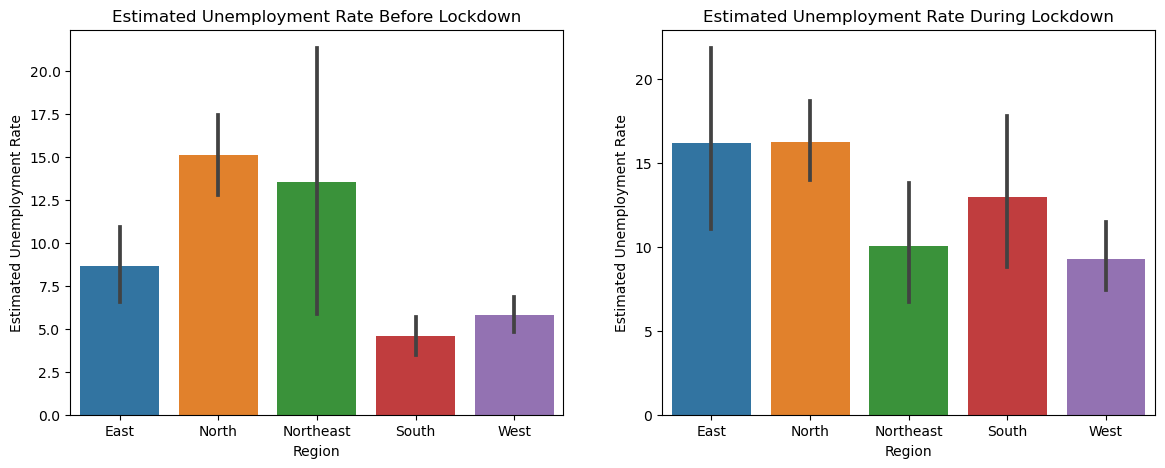

In [19]:
# Chart 1 - Bar Chart Visualisation code for region wise Estimated Unemployment Rate before and during lockdown

# Create a figure with two subplots side by side.
plt.figure(figsize = (14, 5))

# Subplot 1 - Estimated Unemployment Rate before lockdown
plt.subplot(1, 2, 1)

# Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate Before Lockdown
sns.barplot(x = 'Region', y = 'Estimated Unemployment Rate', data = dataframe)

# Set labels and titles for first subplot.
plt.xlabel('Region', fontsize = 10)
plt.ylabel('Estimated Unemployment Rate', fontsize = 10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize = 12)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Create a bar plot for the Estimated Unemployment Rate During Lockdown
sns.barplot(x = 'Region', y = 'Estimated Unemployment Rate', data = dataframe_c)

# Set labels and titles for the second subplot
plt.xlabel('Region', fontsize = 10)
plt.ylabel('Estimated Unemployment Rate', fontsize = 10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize = 12)

# Display subplot side by side
plt.show()

#### From the above charts we got to know that the Estimated Unemployment Rate are more higher during the lockdown period compared to the before lockdown period.

### Chart 2 - Swarm Plot for State Wise Estimated Unemployment Rate

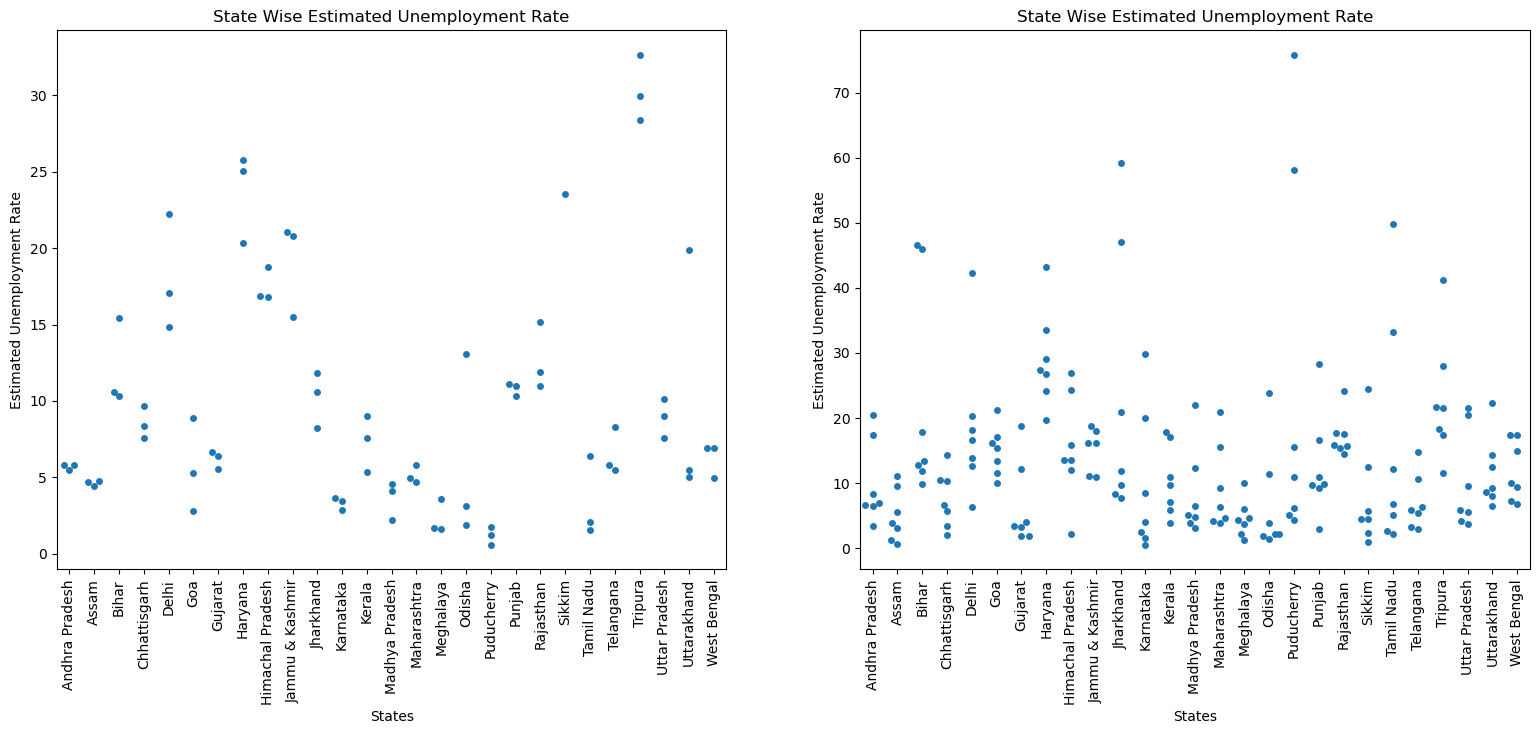

In [46]:
# Chart 2 - Swarm plot visualisation code for  State Wise Estimated Unemployment Rate before and during lockdown
# Create a figure with two subplots side by side.
plt.figure(figsize = (19, 7))

# Subplot 1 - State Wise Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Create a swarm plot to visualise the Estimated Unemployment Rate Before Lockdown
sns.swarmplot(x = 'States', y = 'Estimated Unemployment Rate', data = dataframe)
plt.xticks(rotation = 90)

# Set the labels and title for the first subplot
plt.xlabel('States', fontsize = 10)
plt.ylabel('Estimated Unemployment Rate', fontsize = 10)
plt.title('State Wise Estimated Unemployment Rate', fontsize = 12)

# Subplot 2 - State Wise Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Create a swarm plot to visualise the Estimated Unemployment Rate During Lockdown
sns.swarmplot(x = 'States', y = 'Estimated Unemployment Rate', data = dataframe_c)
plt.xticks(rotation = 90)

# Set the labels and title for the second subplot
plt.xlabel('States', fontsize = 10)
plt.ylabel('Estimated Unemployment Rate', fontsize = 10)
plt.title('State Wise Estimated Unemployment Rate', fontsize = 12)

# Display the subplots side by side
plt.show()

#### From the above charts, we can see that in terms of the State-wise Estimated Unemployment Rate, Tripura, Haryana, and Sikkim had the highest rates before the lockdown period. During the lockdown period, Puducherry, Jharkhand, and Punjab took the top positions for the Estimated State-wise Unemployment Rate.

### Chart 3 - Bar Plot for State Wise Estimated Unemployment Rate

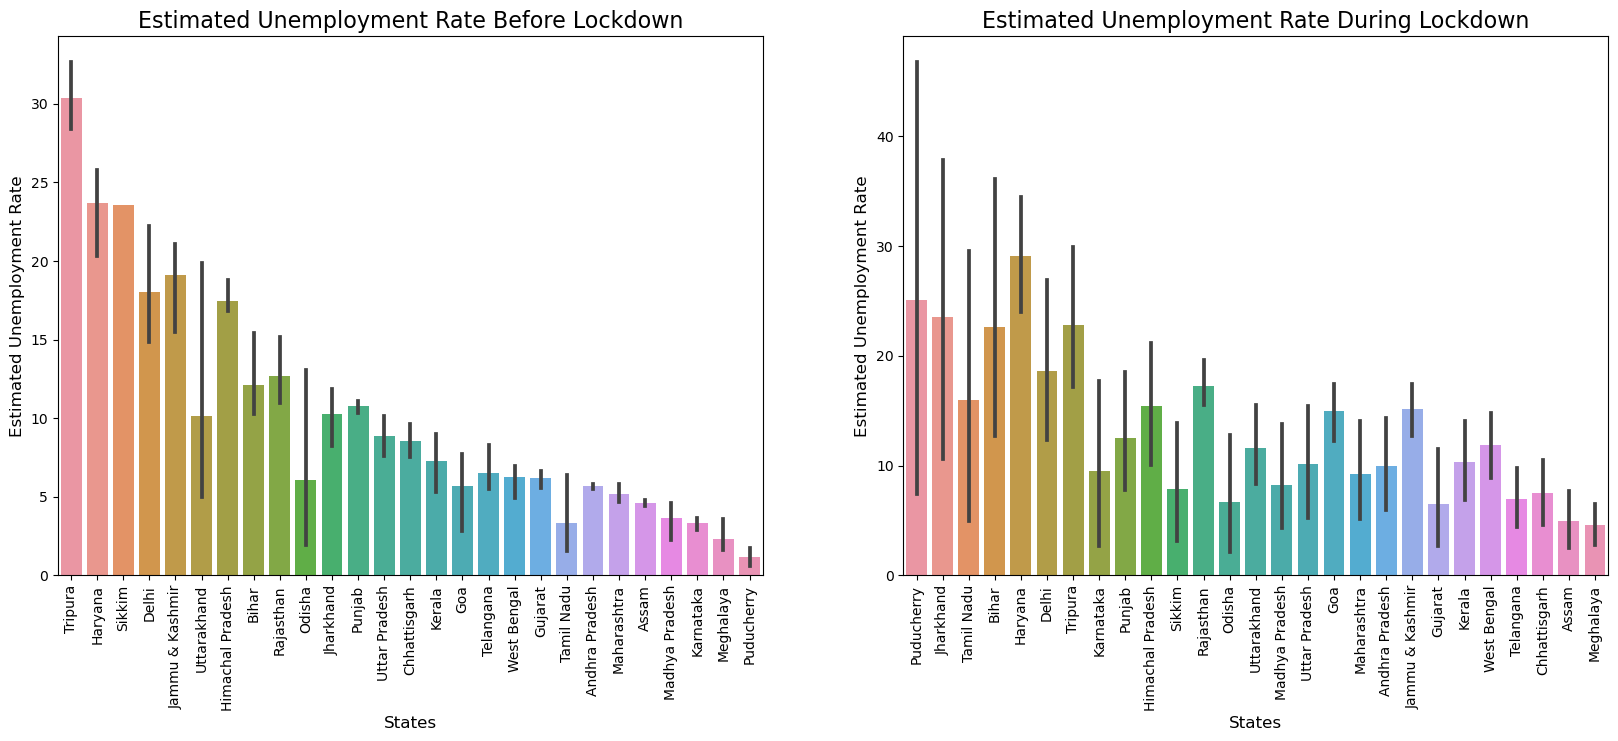

In [31]:
# Chart 3 - Bar Plot visualization code for State Wise Estimated Unemployment Rate Before and During Lockdown time
# Create a figure with two subplots side by side
plt.figure(figsize = (20, 7))

# Subplot 1 : Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Create a Bar plot to visualise the Estimated Unemployment Rate Before Lockdown
sns.barplot(x = 'States', y = 'Estimated Unemployment Rate', data = dataframe.sort_values(by = 'Estimated Unemployment Rate', ascending = False))
plt.xticks(rotation  = 90)

# Set the labels and title for the first subplot
plt.xlabel('States', fontsize = 12)
plt.ylabel('Estimated Unemployment Rate', fontsize = 12)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize = 16)

# Subplt 2 : Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Create a Bar plot to visualise the Estimeted Unemployment Rate During Lockdown
sns.barplot(x = 'States', y = 'Estimated Unemployment Rate', data = dataframe_c.sort_values(by = 'Estimated Unemployment Rate', ascending = False))
plt.xticks(rotation = 90)

# Set the labels and title for the second subplot
plt.xlabel('States', fontsize = 12)
plt.ylabel('Estimated Unemployment Rate', fontsize = 12)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize = 16)

# Display the subplots side by side
plt.show()

#### From the above charts, we can see that before the lockdown, Tripura, Haryana, and Sikkim had the highest Estimated Unemployment Rates by State. During the lockdown, Puducherry and Jharkhand moved to the top positions for the Estimated State-wise Unemployment Rate.

### Chart 4 - State Wise Estimated Employed Workforce

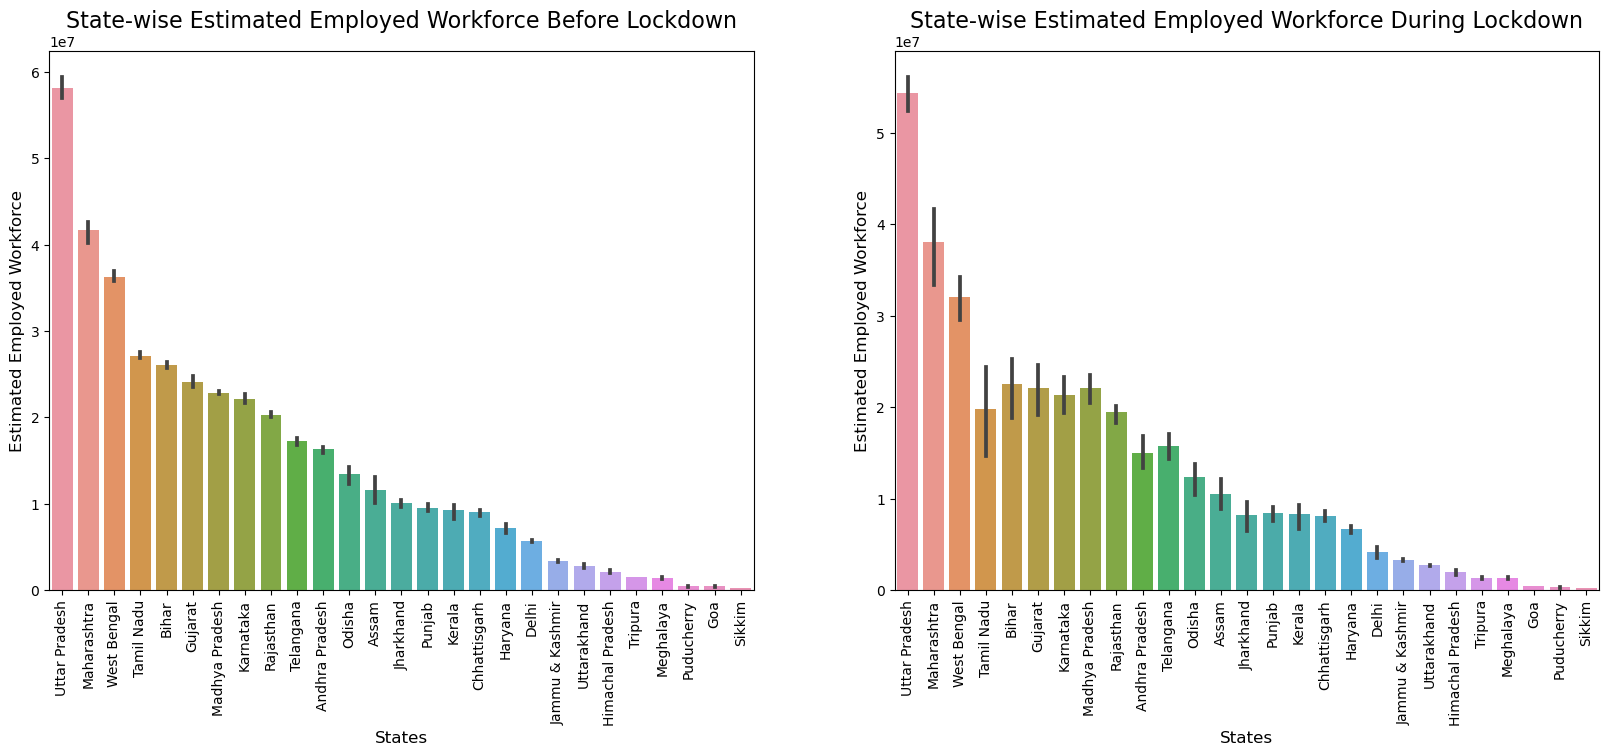

In [30]:
# Chart 4 - Bar plot visualisation code for State-wise Estimated Employed Workforce
# Create a figure with two subplots side by side
plt.figure(figsize = (20, 7))

# Subplot 1 : Estimated Employed Workforce Before Lockdown
plt.subplot(1, 2, 1)

# Create a bar plot to visualize Estimated Employed Workforce Before Lockdown
sns.barplot(x = 'States', y = 'Estimated Employed', data = dataframe.sort_values(by = 'Estimated Employed', ascending = False))
plt.xticks(rotation = 90)

# Set the labels and title for the first subplot
plt.xlabel('States', fontsize = 12)
plt.ylabel('Estimated Employed Workforce', fontsize = 12)
plt.title('State-wise Estimated Employed Workforce Before Lockdown', fontsize = 16)

# Subplot 2 : Estimated Employed Workforce During Lockdown
plt.subplot(1, 2, 2)

# Create a bar plot to visualize Estimated Employed Workforce During Lockdown
sns.barplot(x = 'States', y = 'Estimated Employed', data = dataframe_c.sort_values(by = 'Estimated Employed', ascending = False))
plt.xticks(rotation = 90)

# Set the labels and title for the second subplot
plt.xlabel('States', fontsize = 12)
plt.ylabel('Estimated Employed Workforce', fontsize = 12)
plt.title('State-wise Estimated Employed Workforce During Lockdown', fontsize = 16)

# Display the subplots side by side
plt.show()

#### From the above chart, we can see that states like Uttar Pradesh, Maharashtra, and West Bengal had the highest Estimated Employed Workforce before the lockdown period. During the lockdown period, these states remained at the top for the Estimated Employed Workforce.

### Chart 5 - State Wise Estimated Labour Participation Rate

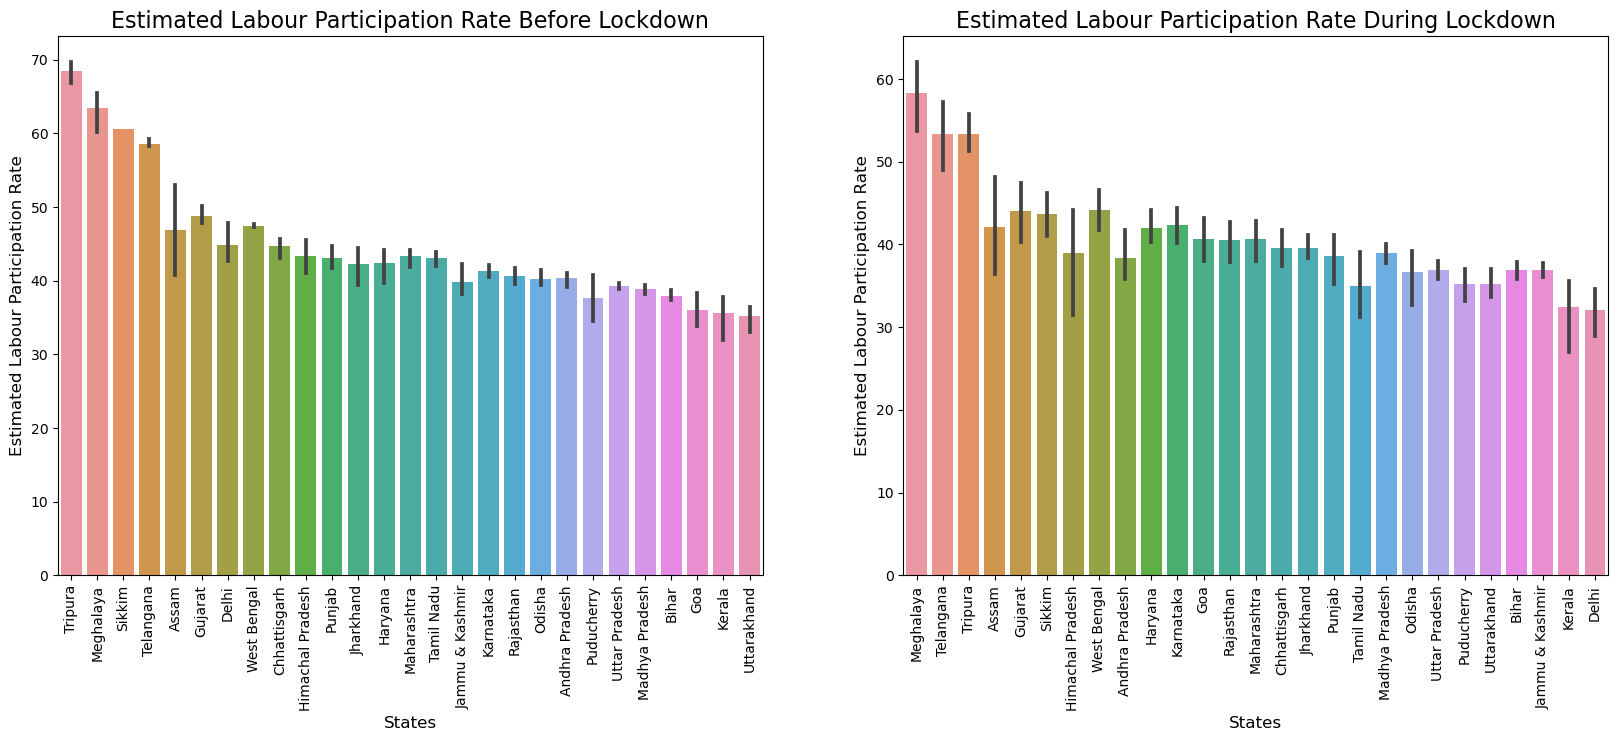

In [33]:
# Chart 5 - Bar plot Visualization code for State-wise Estimated Labour Participation Rate.
# Create a figure with two subplots side by side.
plt.figure(figsize = (20, 7))

# Subplot 1 : State-wise Estimated Labour Participation Before Lockdown Period
plt.subplot(1, 2, 1)

# Create a bar plot to visualize the Estimated Labour Participation Rate Before Lockdown.
sns.barplot(x = 'States', y = 'Estimated Labour Participation Rate', data = dataframe.sort_values(by = 'Estimated Labour Participation Rate', ascending = False))
plt.xticks(rotation = 90)

# Set the labels and title for the first subplot
plt.xlabel('States', fontsize = 12)
plt.ylabel('Estimated Labour Participation Rate', fontsize = 12)
plt.title('Estimated Labour Participation Rate Before Lockdown', fontsize = 16)

# Subplot 2 : State-wise Estimated Labour Participation During Lockdown Period
plt.subplot(1, 2, 2)

# Create a bar plot to visualize the Estimated Labour Participation Rate During Lockdown.
sns.barplot(x = 'States', y = 'Estimated Labour Participation Rate', data = dataframe_c.sort_values(by = 'Estimated Labour Participation Rate', ascending = False))
plt.xticks(rotation = 90)

# Set the labels and title for the second subplot
plt.xlabel('States', fontsize = 12)
plt.ylabel('Estimated Labour Participation Rate', fontsize = 12)
plt.title('Estimated Labour Participation Rate During Lockdown', fontsize = 16)

# Display the subplots side by side
plt.show()

#### From the above chart, we can see that states like Tripur, Meghalaya, Sikkim, and Telangana had the highest Estimated Labour Participation Rate before the lockdown period. During the lockdown period,  Meghalaya, Telangana, and Tripura moved to the top positions for the  Estimated Labour Participation Rate.

### Chart 6 - Correlation Heatmap

In [34]:
# Create New Dataframes
df1_stats = dataframe[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
df2_stats = dataframe_c[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]

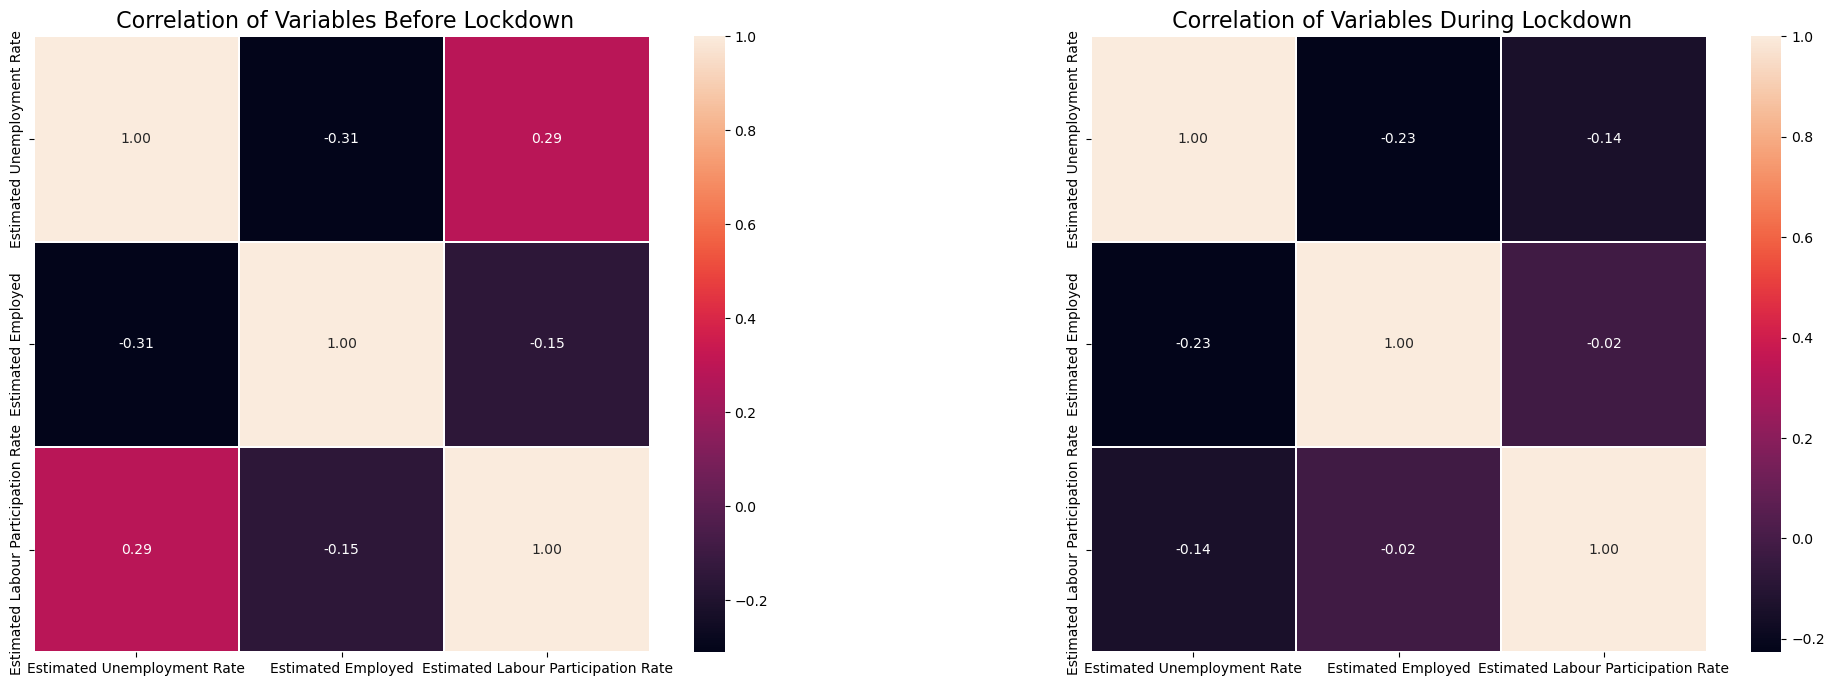

In [37]:
# Chart 6 - Correlation Heatmap 
# Create a figure with two subplots side by side.
plt.figure(figsize = (25, 8))

# Subplot 1 : Correlation of Variables Before Lockdown
plt.subplot(1, 2, 1)

# Create a heatmap to visualize the Correlation between variables in df1_stats.
sns.heatmap(df1_stats.corr(), annot = True, linewidth = 0.1, fmt = '.2f', square = True)

# Set the title for the first subplot
plt.title(' Correlation of Variables Before Lockdown', fontsize = 16)

# Subplot 2 : Correlation of Variables Durinf Lockdown
plt.subplot(1, 2, 2)

# Create a heatmap to visualize the Correlation between variables in df1_stats.
sns.heatmap(df2_stats.corr(), annot = True, linewidth = 0.1, fmt = '.2f', square = True)

# Set the title for the first subplot
plt.title(' Correlation of Variables During Lockdown', fontsize = 16)

# Display the subplots side by side
plt.show() 

#### The heatmaps reveal that the estimated unemployment rate and the estimated employed workforce are highly negatively correlated both before and during the lockdown period.